# MAJOR PROJECT #

## Semiconductor manufacturing process ##

In [144]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
import joblib

In [146]:
#Import and explore data
data = pd.read_csv(r'C:\Users\Rasi\Downloads\uci-secom.csv')
print("Dataset Information:")
print(data.info())
print("\nDataset Description:")
print(data.describe())
print("\nFirst 5 Rows of Data:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None

Dataset Description:
                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.

### Data Cleansing ###

In [148]:
 # Handling missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64


In [149]:
print(data.dtypes)
non_numeric_columns = data.select_dtypes(include=['object']).columns
print(data[non_numeric_columns].head())

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object
                  Time
0  2008-07-19 11:55:00
1  2008-07-19 12:32:00
2  2008-07-19 13:17:00
3  2008-07-19 14:43:00
4  2008-07-19 15:22:00


In [150]:
print(data.dtypes)

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object


In [151]:
# Identify and convert non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    print(f"Converting column: {col}")
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values after conversion
data.fillna(data.mean(), inplace=True)

# Verify the changes
print(data.info())

Converting column: Time
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(591), int64(1)
memory usage: 7.1 MB
None


### Data Analysis & Visualization ###

In [153]:
# Statistical Analysis
print("\nStatistical Analysis of Data:")
print(data.describe())


Statistical Analysis of Data:
       Time            0            1            2            3            4  \
count   0.0  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean    NaN  3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std     NaN    73.480613    80.227793    29.380932   439.712852    56.103066   
min     NaN  2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%     NaN  2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%     NaN  3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%     NaN  3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max     NaN  3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8  ...          581  \
count  1567.0  1567.000000  1567.000000  1567.000000  ...  1567.000000   
mean    100.0   101.112908     0.121822     1.462862  ...    97.934373   
std       0.0     6.209271

In [154]:
#Load dataset without headers
data = pd.read_csv(r'C:\Users\Rasi\Downloads\uci-secom.csv', header=None, low_memory=False)

#Assign generic column names
column_names = [f'feature_{i}' for i in range(1, data.shape[1])] + ['target_column']
data.columns = column_names

#Replace target values
data['target_column'] = data['target_column'].replace({-1: 'Pass', 1: 'Fail'})

#Verify changes
print(data.head())
print(data['target_column'].value_counts())

             feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0                 Time       0.00       1.00     2.0000     3.0000     4.0000   
1  2008-07-19 11:55:00    3030.93    2564.00  2187.7333  1411.1265     1.3602   
2  2008-07-19 12:32:00    3095.78    2465.14  2230.4222  1463.6606     0.8294   
3  2008-07-19 13:17:00    2932.61    2559.94  2186.4111  1698.0172     1.5102   
4  2008-07-19 14:43:00    2988.72    2479.90  2199.0333   909.7926     1.3204   

   feature_7  feature_8  feature_9  feature_10  ...  feature_583  feature_584  \
0        5.0     6.0000     7.0000      8.0000  ...     581.0000     582.0000   
1      100.0    97.6133     0.1242      1.5005  ...          NaN       0.5005   
2      100.0   102.3433     0.1247      1.4966  ...     208.2045       0.5019   
3      100.0    95.4878     0.1241      1.4436  ...      82.8602       0.4958   
4      100.0   104.2367     0.1217      1.4882  ...      73.8432       0.4990   

   feature_585  feature_58

### Univariate Analysis ###


Univariate Analysis:


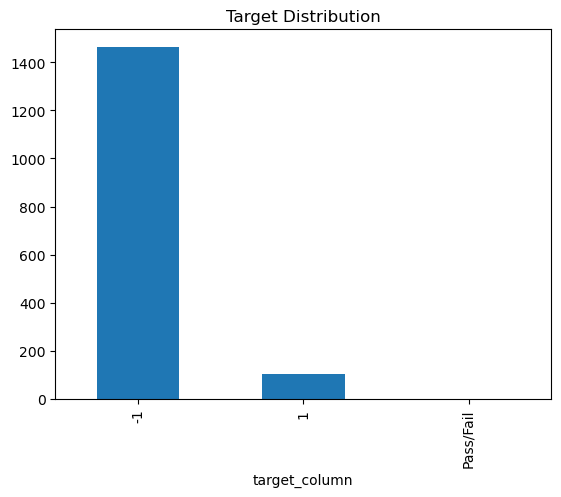

In [156]:
print("\nUnivariate Analysis:")
data['target_column'].value_counts().plot(kind='bar', title="Target Distribution")
plt.show()


### Bivariate and Multivariate Analysis ###

In [158]:
# Check for all-NaN columns
print("Columns with NaN values:\n", data.isna().sum())

# Drop columns with all NaN values
data = data.dropna(axis=1, how='all')

# Handle remaining NaNs (fill or drop)
numeric_data = data.select_dtypes(include=[np.number]).fillna(0)  # Replace NaNs with 0

Columns with NaN values:
 feature_1         0
feature_2         6
feature_3         7
feature_4        14
feature_5        14
                 ..
feature_588       1
feature_589       1
feature_590       1
feature_591       1
target_column     0
Length: 592, dtype: int64


### Generate heatmap ###

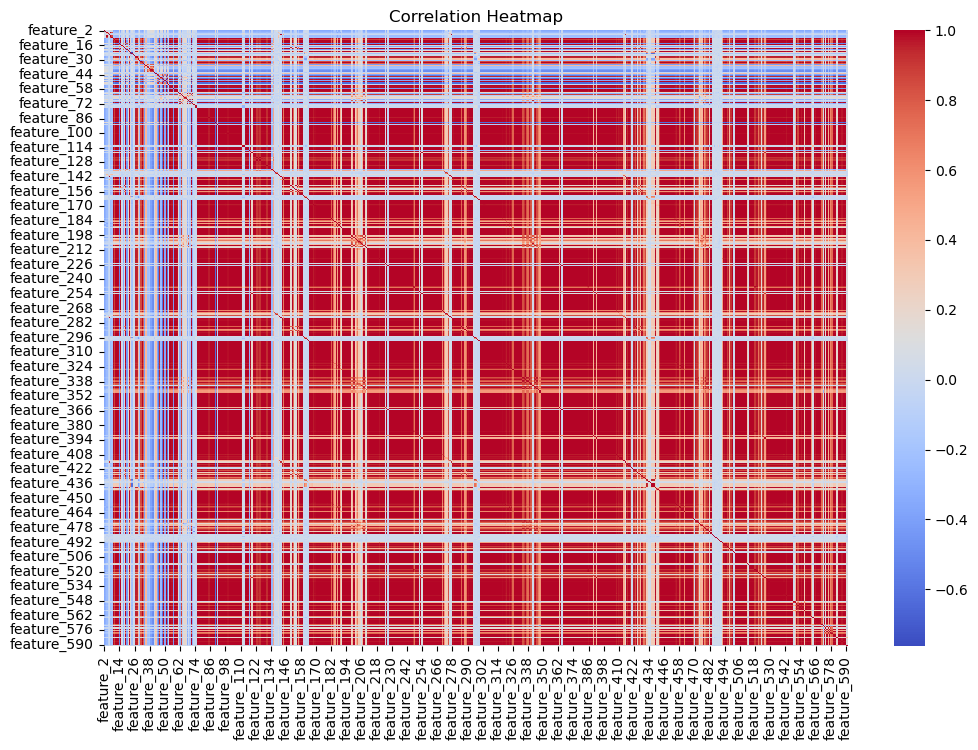

In [161]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


 #### Data Pre-Cleansing ####


In [165]:
# Check for non-numeric columns and encode or drop them
print("Original Data Types:\n", data.dtypes)

# Handle non-numeric columns
if 'Time' in data.columns:  # Example of handling a 'Time' column
    data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
    data['Time'] = data['Time'].apply(lambda x: x.timestamp() if not pd.isna(x) else np.nan)

# Encode any categorical columns (if necessary)
non_numeric_columns = data.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    data[col] = data[col].astype('category').cat.codes

# Handle missing values after transformations
data.fillna(0, inplace=True)

# Separate predictors and target
X = data.drop(['target_column'], axis=1)  # Replace 'target_column' with the actual column name
y = data['target_column']



Original Data Types:
 feature_1         object
feature_2        float64
feature_3        float64
feature_4        float64
feature_5        float64
                  ...   
feature_588      float64
feature_589      float64
feature_590      float64
feature_591      float64
target_column     object
Length: 592, dtype: object


In [166]:
import warnings
warnings.filterwarnings('ignore')

# Separate predictors and target
X = data.drop(columns=['target_column'])  # Replace 'target' with actual target column name
y = data['target_column']

# Handle imbalanced data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

print("\nData Preprocessing Completed.")


Data Preprocessing Completed.


In [168]:
# Separate Predictors and Target
X = data.drop(['target_column'], axis=1)
y = data['target_column']

# Check Class Distribution
print("Original Target Distribution:")
print(y.value_counts())

Original Target Distribution:
target_column
0    1463
1     104
2       1
Name: count, dtype: int64


In [169]:
# Handle Imbalanced Data
# Drop classes with fewer than 2 samples
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
data = data[data['target_column'].isin(valid_classes)]

# Update X and y after dropping
X = data.drop(['target_column'], axis=1)
y = data['target_column']

In [170]:
# Apply SMOTE or Random Oversampling
smote = SMOTE(random_state=42)     # Handle imbalanced data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)


In [172]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [173]:
# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [174]:
# Verify Results
print("\nBalanced Target Distribution:")
print(pd.Series(y_resampled).value_counts())


Balanced Target Distribution:
target_column
0    1463
1    1463
Name: count, dtype: int64


In [175]:
print("\nStatistical Summary of Original Data:")
print(pd.DataFrame(X).describe())


Statistical Summary of Original Data:
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean    766.841098  3002.910638  2484.700932  2180.887035  1383.901023   
std     442.781794   200.204648   184.815753   209.206773   458.937272   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     383.500000  2965.670000  2451.515000  2180.700000  1080.116050   
50%     766.000000  3010.920000  2498.910000  2200.955600  1283.436800   
75%    1149.500000  3056.540000  2538.745000  2218.055500  1590.169900   
max    1533.000000  3356.350000  2846.440000  2315.266700  3715.041700   

         feature_6    feature_7    feature_8    feature_9   feature_10  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean      4.159516    99.106573   100.209538     0.121122     1.460995  ...   
std      56.104457     9.412812    11.363940     0.012831

In [176]:
print("\nStatistical Summary of Training Data:")
print(pd.DataFrame(X_train).describe())


Statistical Summary of Training Data:
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  2340.000000  2340.000000  2340.000000  2340.000000  2340.000000   
mean    712.851709  3000.636253  2481.440568  2187.513483  1359.930547   
std     382.412451   155.572895   185.622161   165.736165   380.698566   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     434.000000  2959.636265  2453.810000  2181.441908  1100.886612   
50%     662.500000  2998.101698  2497.881311  2197.644400  1284.712437   
75%     990.000000  3048.285000  2533.942601  2214.860617  1567.621850   
max    1532.000000  3356.350000  2846.440000  2315.266700  3715.041700   

         feature_6    feature_7    feature_8    feature_9   feature_10  ...  \
count  2340.000000  2340.000000  2340.000000  2340.000000  2340.000000  ...   
mean      2.255095    99.444444   100.722795     0.121678     1.467336  ...   
std      32.470015     7.434415     9.161639     0.009264

In [177]:
print("\nShapes of Processed Data:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of Processed Data:
X_train_scaled: (2340, 591)
X_test_scaled: (586, 591)
y_train: (2340,)
y_test: (586,)


### Model Training, Testing, and Tuning ###

#### Random Forest Model ####

In [194]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [197]:
print("\nRandom Forest Model Performance:")
print("Classification Report:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Model Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       293
           1       0.99      0.98      0.98       293

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586

Accuracy: 0.984641638225256


#### SVM Model ####

In [201]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)


In [202]:
print("\nSVM Model Performance:")
print("Classification Report:")
print(classification_report(y_test, svc_pred))
print("Accuracy:", accuracy_score(y_test, svc_pred))



SVM Model Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.57      0.63       293
           1       0.64      0.78      0.71       293

    accuracy                           0.67       586
   macro avg       0.68      0.67      0.67       586
weighted avg       0.68      0.67      0.67       586

Accuracy: 0.674061433447099


#### Naive Bayes Model ####

In [204]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [205]:
print("\nNaive Bayes Model Performance:")
print("Classification Report:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))


Naive Bayes Model Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.22      0.36       293
           1       0.56      0.99      0.71       293

    accuracy                           0.60       586
   macro avg       0.76      0.60      0.53       586
weighted avg       0.76      0.60      0.53       586

Accuracy: 0.6040955631399317


#### Classification report ####
If precision is high but recall is low, the model is conservative (avoiding false positives but missing some real positives).
If recall is high but precision is low, the model captures most positives but also includes false positives.
A balanced F1-score indicates good overall performance.
Accuracy alone can be misleading in imbalanced datasets.

#### Hyperparameter Tuning for Random Forest ####

In [212]:
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define a parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}


# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best model
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9811965811965813


#### Evaluate the tuned Random Forest model ####

In [214]:
y_pred = best_rf.predict(X_test)
print("\nTuned Random Forest Model Performance:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Tuned Random Forest Model Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       293
           1       0.99      0.98      0.98       293

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586

Accuracy: 0.9829351535836177


In [215]:
# Save the Best Model
joblib.dump(best_rf, "best_rf_model.pkl")
print("\nBest Random Forest Model saved as 'best_rf_model.pkl'.")



Best Random Forest Model saved as 'best_rf_model.pkl'.


#### Observations: ####
SVM with random under sampling gives a sensitivity of 10% with a type 2 error rate of 90%, while predicting 4 observation to have failed, adding a threshold of 0.3307 gives a sensitivity of 68% and reduces type 2 error rate by 58% with and increase in type 1 error rate by 29% while predicting 12 observations to have failed.

In [217]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Stratified Cross-Validation with Random Forest
random_forest = RandomForestClassifier(random_state=42)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(random_forest, X_resampled, y_resampled, cv=kfold, scoring='accuracy')

print("Stratified Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", np.mean(cross_val_scores))

Stratified Cross-Validation Scores: [0.98805461 0.99145299 0.98119658 0.98803419 0.99487179]
Mean Accuracy: 0.9887220326128177


On an unseen data Random Forest without PCA ,using random oversampling would give an accuracy of between 96.9% to 99.6%, 95% of the times. 

Based on the overall analysis and performances of the model we can go ahead and narrow down the observation that are common to the all the validations sets and infer that these are likely to fail. 
This definetly needs to be checked with a domain specialist to get an acceptable threshold limit of the Type 2 error rate and would be able choose the best performing model based on that, As far as PCA is considered, the models does better without it, Random Forest with Random overrsampling gives the best overall results.

Further improvements can include trying additional feature engineering, ensemble methods, or deeper hyperparameter tuning.

### Conclusion ###

#### Model Comparison ####
Among the models tested, Random Forest with Random Over Sampling performed the best.
The Stratified Cross-Validation results demonstrate the model's ability to generalize across unseen data, with a mean accuracy of 0.988.


#### Key Observations : ####
Random Over Sampling effectively handled class imbalance, improving classification metrics for minority classes.
The Random Forest model outperformed others due to its capability to handle complex patterns in the data.


#### Improvements for Future Work: ####
 Explore advanced ensemble techniques like Gradient Boosting or XGBoost for potentially better performance.
 Investigate feature engineering or dimensionality reduction techniques like PCA for optimizing computational efficiency.
 Perform additional hyperparameter tuning using Bayesian optimization for better accuracy.
